# 네이버 연애 공감별 랭킹 뉴스 데이터 수집 및 시각화


*   https://entertain.naver.com/ranking/sympathy

## 1.패키지 설치 및 임포트

In [1]:
!pip install konlpy
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.9 MB/s eta 0:00:00


In [23]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

import re
import pandas as pd
import datetime
from pytz import timezone

import warnings
warnings.filterwarnings('ignore')

## 2.네이버 연애 공감별 랭킹 뉴스 데이터 수집

In [25]:
# 1) 데이터 프레임 생성
data = pd.DataFrame(columns=['순위', '공감종류', '기사제목', '기사링크', '기사내용', '공감수', '수집일자'])

# 2) 네이버 연애 랭킹 뉴스 URL
#https://entertain.naver.com/ranking/sympathy
#https://entertain.naver.com/ranking/sympathy/cheer
#https://entertain.naver.com/ranking/sympathy/congrats
#https://entertain.naver.com/ranking/sympathy/expect
#https://entertain.naver.com/ranking/sympathy/surprise
#https://entertain.naver.com/ranking/sympathy/sad

url_list = ['', '/cheer', '/congrats', '/expect', '/surprise', '/sad']

for n in url_list:
  # 2) 공감별 URL 준비
  url = 'https://entertain.naver.com/ranking/sympathy' + n
  print(url)

  # 공감종류
  sympathy = 'love'

  if n != '':
    sympathy = n.replace('/', '')

  # 3) url 접속하여 html 가져오기
  html = urlopen(url)

  # 4) HTML 태그 파싱하여 변환
  soup = BeautifulSoup(html, 'html.parser')

  # 5) 네이버 연애 랭킹 정보가 있는 li 만 추출 -> _inc_news_lst3_rank_reply 가져오기
  li = soup.find_all('li', {'class': '_inc_news_lst3_rank_reply'})

  # 6) 네이버 연애 랭킹 30위 데이터 수집
  for index_l in range(0, len(li)):
    #순위
    rank = li[index_l].find('em', {'class': 'blind'}).text

    #뉴스 제목
    title = li[index_l].find('a', {'class': 'tit'}).text

    #뉴스 내용
    summary = li[index_l].find('p', {'class': 'summary'}).text

    #뉴스 링크
    link = li[index_l].find('a').attrs['href']

    #공감수
    temp_cnt = li[index_l].find('a', {'class': 'likeitnews_item_likeit'}).text.replace('\n', '')
    cnt = re.sub('[^0-9]', '', temp_cnt) # 숫자만 제외하고 모두 삭제

    temp_df = pd.DataFrame({'순위': rank,
                            '공감종류': sympathy,
                            '기사제목': title,
                            '기사링크': link,
                            '기사내용': summary,
                            '공감수': cnt,
                            '수집일자': datetime.datetime.now(timezone('Asia/Seoul'))},
                           index=['순위'])

    data = pd.concat([data, temp_df], ignore_index=True)

    print('Complets of ' + rank + ' : ' + title)

print('-' * 50)
print(data.info())

https://entertain.naver.com/ranking/sympathy
Complets of 1 : '감성 No.1' 임영웅 '온기' 뮤직비디오 700만뷰
Complets of 2 : 임영웅 팬클럽 '영웅시대 with Hero 대구·경북', 취약계층에 1000만원 상당 도시락 후원
Complets of 3 : 임영웅 팬클럽, 대구 달서구 취약계층 위해 도시락 전달…1천만 원 상당
Complets of 4 : 임영웅, 더블싱글 신곡 '온기' 뮤직비디오 700만 뷰
Complets of 5 : 배우 못지않은 임영웅 ‘온기’ MV 700만 돌파
Complets of 6 : " 상상이 그대로..행복" 방탄소년단 지민, 해피 에너지 발산
Complets of 7 : “이보다 더 좋을 순 없다” 촬영장 빛낸 BTS 지민
Complets of 8 : 지민, 마칭 밴드 변신
Complets of 9 : 방탄소년단 뷔 '레이니 데이즈' 스포티파이 2억 6000만 스트리밍 돌파
Complets of 10 : ‘배우 데뷔’ 임영웅, 뭘 해도 다 성공~ ‘트롯픽’ 男 1위 [DA:차트]
Complets of 11 : 이찬원, 소아암 치료비 지원 누적 5475만 원
Complets of 12 : 이찬원, 선한스타 누적 기부금액 5475만원… 소아암 환아위해 가왕전 상금 기부
Complets of 13 : 조정석 영화에 이찬원 팬클럽이? '찬스', 영화 '파일럿' 통대관 예약
Complets of 14 : "하하하하 대박" 이찬원과 함께 하는 오감만족 랜선 여행[톡파원25시]
Complets of 15 : '찬또배기' 이찬원, '안돼요 안돼' 무대 600만 뷰 돌파…남다른 인기
Complets of 16 : 이승윤, '어딘가 버스킹 라이브' 성료..정규 3집 선발매 앨범 '역성' 전곡 소화
Complets of 17 : 임영웅 팬클럽, 1000만 원 상당 도시락 후원 “온기 나눔 한끼 드림”
Complets of 18 : '실물 1위 연예인' 방탄소년단 진, 어느 각도서도 無

In [26]:
data['공감종류'].unique()

array(['love', 'cheer', 'congrats', 'expect', 'surprise', 'sad'],
      dtype=object)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype                     
---  ------  --------------  -----                     
 0   순위      179 non-null    object                    
 1   공감종류    179 non-null    object                    
 2   기사제목    179 non-null    object                    
 3   기사링크    179 non-null    object                    
 4   기사내용    179 non-null    object                    
 5   공감수     179 non-null    object                    
 6   수집일자    179 non-null    datetime64[ns, Asia/Seoul]
dtypes: datetime64[ns, Asia/Seoul](1), object(6)
memory usage: 9.9+ KB


## 3.공감별 워드 클라우드 시각화

보고 싶은 공감 랭킹 뉴스를 입력하세요['love', 'cheer', 'congrats', 'expect', 'surprise', 'sad']sad


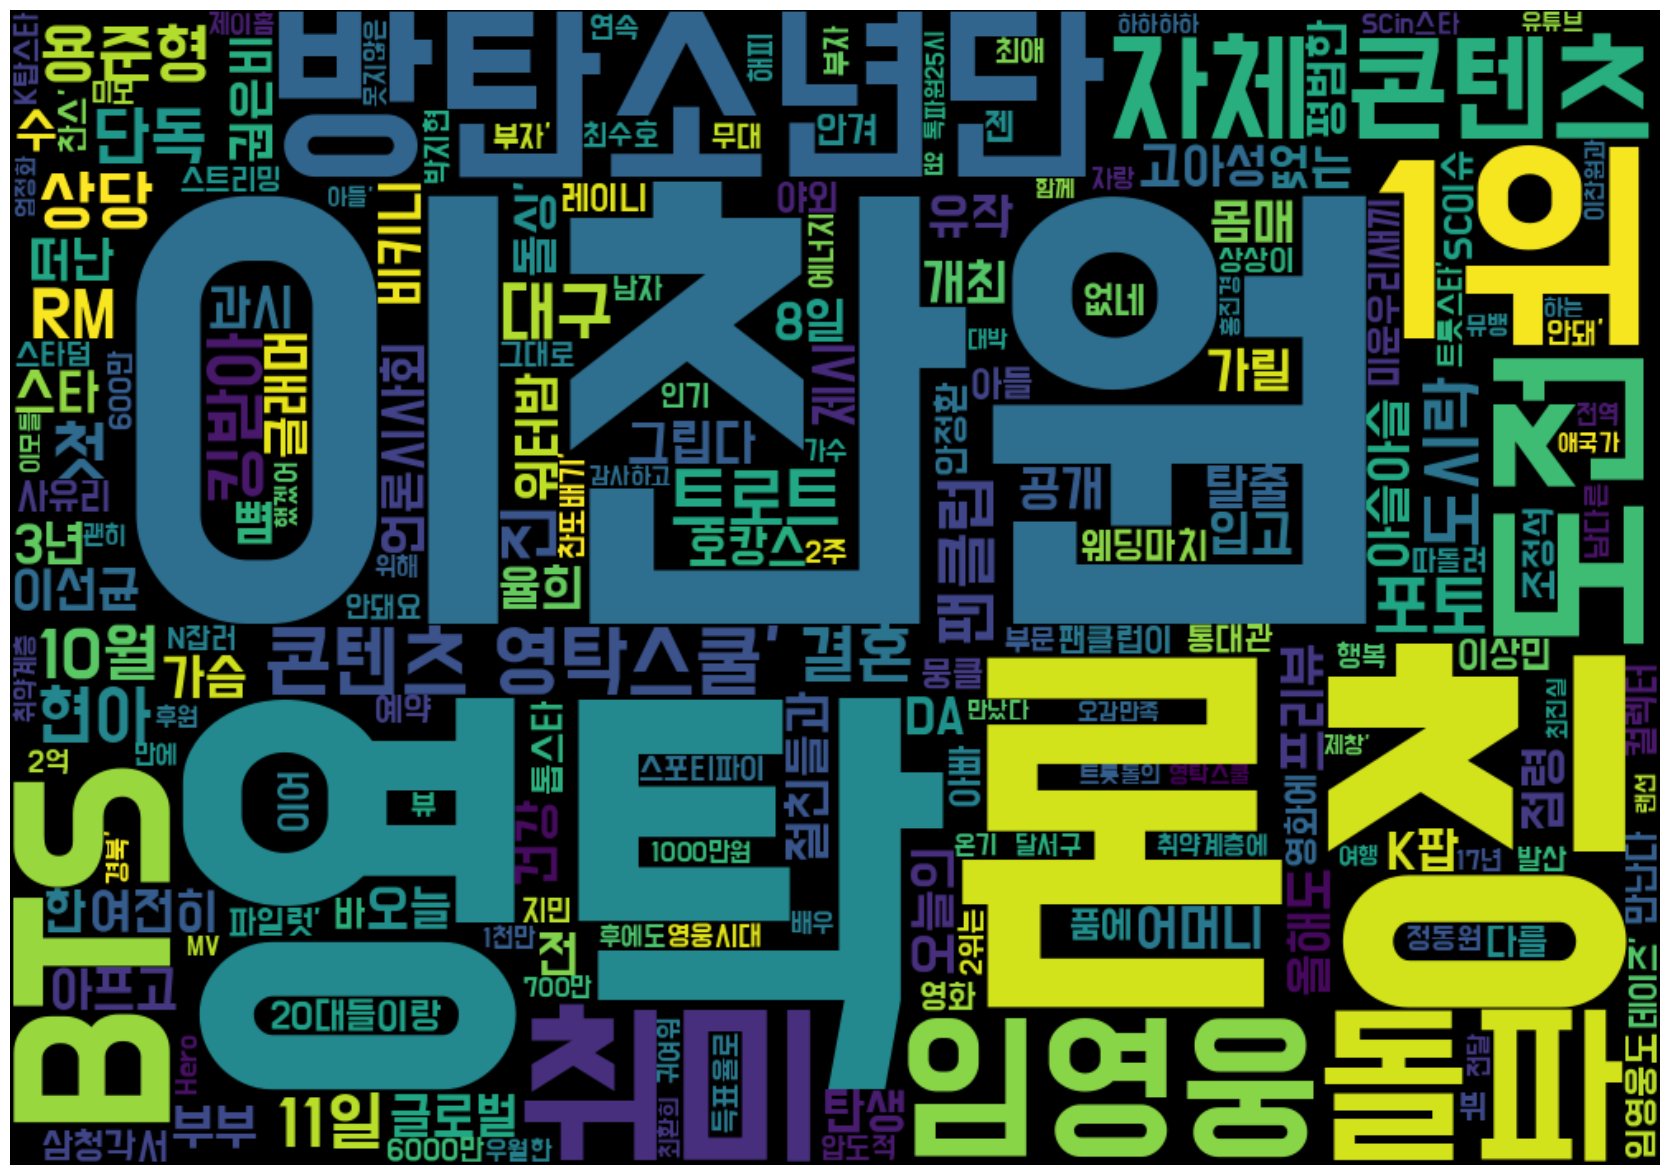

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

input_sympathy = input('보고 싶은 공감 랭킹 뉴스를 입력하세요'+str(data['공감종류'].unique().tolist()))

text = ' '.join(li for li in data[data['공감종류'] == input_sympathy].기사제목.astype(str))

font_path = '/content/BMDOHYEON_ttf.ttf'

plt.subplots(figsize=(25,15))

wc = WordCloud(width=1000, height=700, font_path=font_path).generate(text)

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()